# Frame Element Responses (Pyvista)

In [1]:
import openseespy.opensees as ops

import opstool as opst
import opstool.vis.pyvista as opsvis


In [2]:
opst.load_ops_examples("Frame3D2")
ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)
for etag in [5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21]:
    ops.eleLoad("-ele", etag, "-type", "-beamUniform", 0.0, -10)  # wy=0.0, wz=-10.0

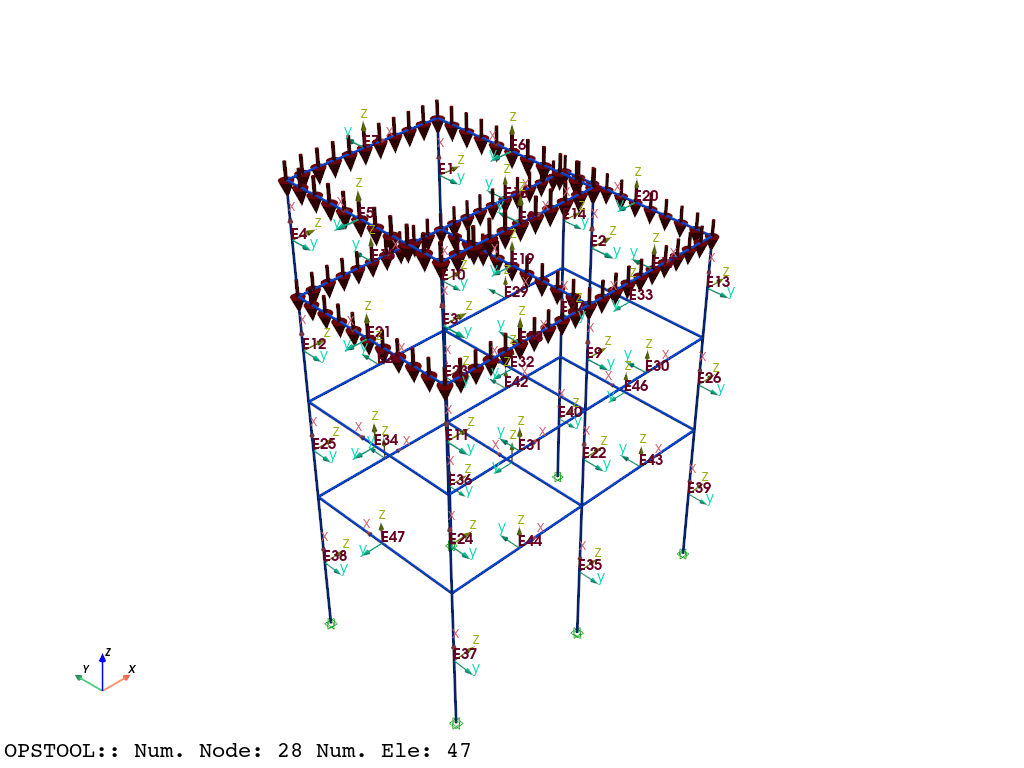

In [3]:
opsvis.set_plot_props(point_size=0, line_width=3, notebook=True)  # notebook=False for practical use
fig = opsvis.plot_model(show_nodal_loads=True, show_ele_loads=True, show_local_axes=True, show_ele_numbering=True)
fig.show(jupyter_backend="static")
# fig.show()

In [4]:
ops.constraints("Transformation")
ops.numberer("RCM")
ops.system("BandGeneral")
ops.test("NormDispIncr", 1.0e-8, 6, 2)
ops.algorithm("Linear")
ops.integrator("LoadControl", 0.1)
ops.analysis("Static")

In [5]:
ODB = opst.post.CreateODB(odb_tag=1)
for i in range(10):
    ops.analyze(1)
    ODB.fetch_response_step()
ODB.save_response()

OPSTOOL ::  All responses data with _odb_tag = 1 saved in .opstool.output/RespStepData-1.nc!

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

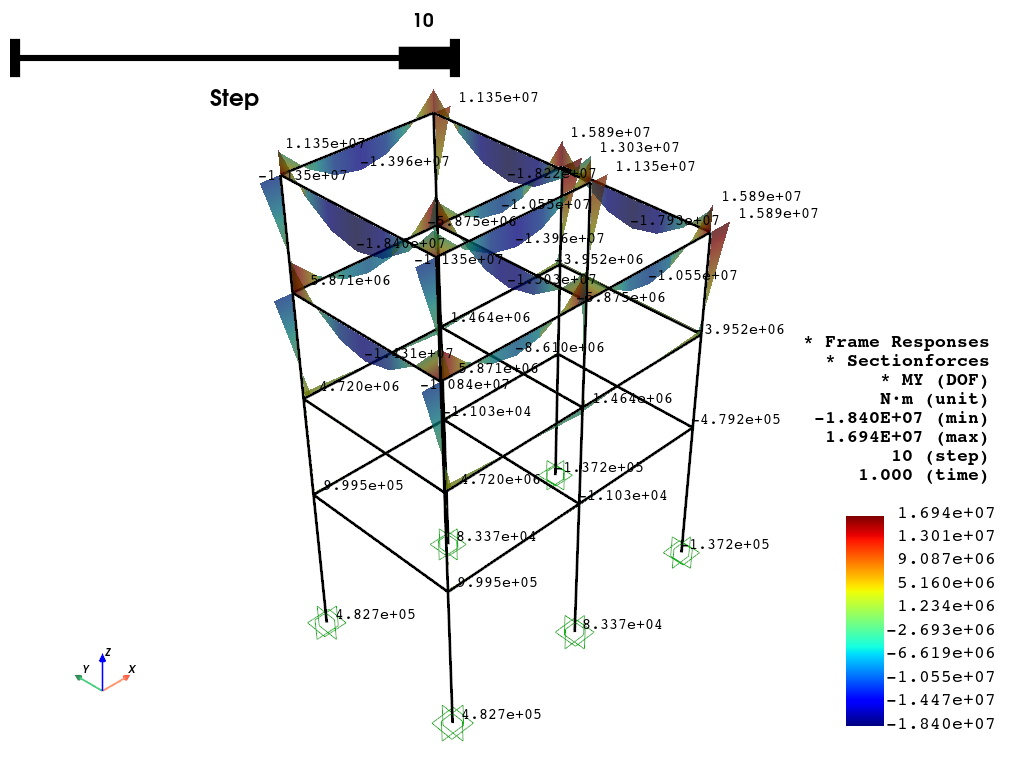

In [6]:
opsvis.set_plot_colors(frame="black", cmap="jet")

fig = opsvis.plot_frame_responses(
    odb_tag=1,
    slides=True,
    resp_type="sectionForces",
    resp_dof="My",
    unit_symbol="N·m",
    scale=1.0,
    style="surface",  # "wireframe", "surface"
    opacity=0.75,  # opacity for "surface" style
    show_values="eleMaxMin",
    show_bc=True,
    bc_scale=3.0,
)
fig.show(jupyter_backend="static")
# fig.show()

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

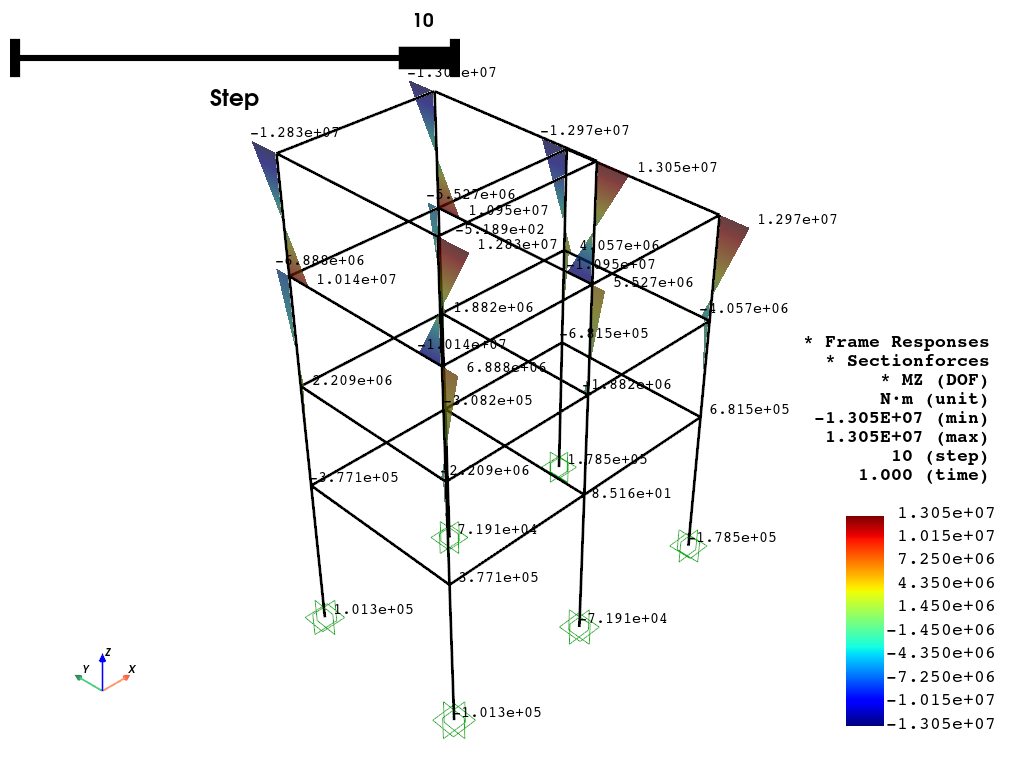

In [7]:
fig = opsvis.plot_frame_responses(
    odb_tag=1,
    slides=True,
    resp_type="sectionForces",
    resp_dof="Mz",
    unit_symbol="N·m",
    scale=1.0,
    style="surface",  # "wireframe", "surface"
    opacity=0.75,  # opacity for "surface" style
    show_values="eleMaxMin",
    show_bc=True,
    bc_scale=3.0,
)
fig.show(jupyter_backend="static")
# fig.show()

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

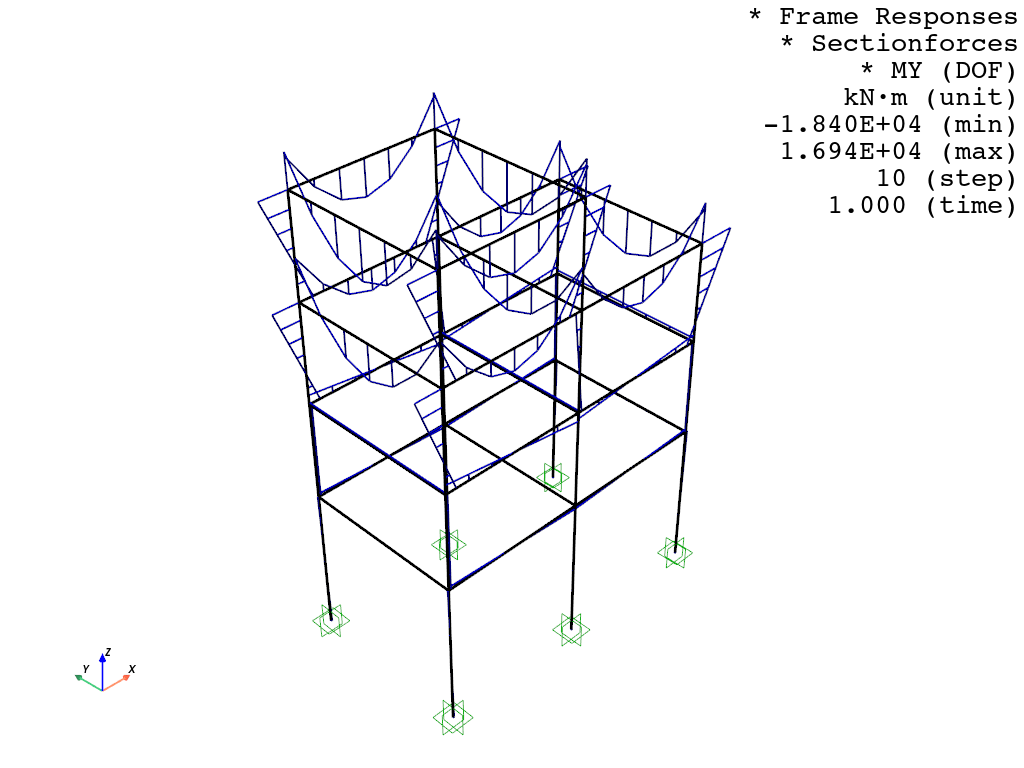

In [8]:
fig = opsvis.plot_frame_responses(
    odb_tag=1,
    slides=False,
    step="absMax",
    resp_type="sectionForces",
    resp_dof="My",
    unit_symbol="kN·m",
    unit_factor=1e-3,
    scale=1.5,
    style="wireframe",  # "wireframe", "surface"
    color="blue",  # single color for wireframe
    line_width=2,  # line width for wireframe
    show_values=False,
    show_bc=True,
    bc_scale=3.0,
)
fig.show(jupyter_backend="jupyterlab")
# fig.show()

In [9]:
fig = opsvis.plot_frame_responses_animation(
    odb_tag=1,
    resp_type="sectionForces",
    resp_dof="My",
    unit_symbol="kN·m",
    scale=1.5,
    # style="wireframe",  # "wireframe", "surface"
    # line_width=2,  # line width for wireframe
    style="surface",  # "wireframe", "surface"
    opacity=0.75,  # opacity for "surface" style
    show_values="MaxMin",
    savefig="images/FrameRespAnimation.gif",
    framerate=2,
    show_bc=True,
    bc_scale=3.0,
)
fig.close()

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

Animation has been saved as images/FrameRespAnimation.gif!


![FrameRespAnimation](images/FrameRespAnimation.gif)